In [105]:
import os
import sys
import subprocess
import numpy as np
# import glob
import json
import pandas as pd
import shutil
import librosa.display
# from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import csv
import IPython.display as ipd
import random

In [106]:
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.utils as utils
import torchvision.transforms as transforms
import os
import random
import numpy as np
import torchvision

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [5]:
ls

 AI1_ASSIGNMENT
 Caltech256_kaggle.ipynb
 CIFAR100-Multilayer-batch-norm.ipynb
 CIFAR10.ipynb
 CIFAR.ipynb
 content/
'cough detection .ipynb'
 coughing_data/
'cough preprocessing - test.ipynb의 사본'
'cough preprocessing - test_ torch.ipynb'
'COVID19 classification - coswara data .ipynb'
'COVID19 classification - coswara data -pytorch .ipynb'
'COVID19 classification - coswara data -pytorch- resnet50 .ipynb'
'COVID19 classification-resnet50_particial .ipynb'
'covid_data_check (1).ipynb'
 covid_data_check.ipynb
 Fasion.ipynb
'FASION MNIST.ipynb'
 fetch_20newsgroups.ipynb
 fish_kaggle.ipynb
 KMNIST.ipynb
 news_summary_partial.ipynb
 object_detection__micro_.ipynb
 QMNIST.ipynb
 seq2seq.ipynb
'seq2seq.ipynb의 사본'
'sesac '/
 svhn.ipynb
 test.ipynb
 torchtext_korean.ipynb
 train.zip
 Untitled
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
'using kaggle dataset.ipynb'


In [ ]:
!unzip train.zip

Archive:  train.zip
replace content/csvs/20210714.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [122]:
 def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(12)

In [123]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/content/csvs'

In [124]:
import torchvision.transforms as transforms
# batch must contain tensors, numpy arrays, numbers, dicts or lists
compose = transforms.Compose([    
    transforms.CenterCrop((220,450)),
    transforms.Resize((255,255)),
    transforms.ToTensor()
])
dataset = torchvision.datasets.ImageFolder(data_dir+'/train',transform=compose)

In [125]:
print(type(dataset))

<class 'torchvision.datasets.folder.ImageFolder'>


In [126]:
print(len(dataset))

1567


In [127]:
n = 100
data, target = dataset[n]

In [128]:
dataset

Dataset ImageFolder
    Number of datapoints: 1567
    Root location: /content/drive/MyDrive/Colab Notebooks/content/csvs/train
    StandardTransform
Transform: Compose(
               CenterCrop(size=(220, 450))
               Resize(size=(255, 255), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )

In [129]:
# import torchvision.transforms as transforms
# # batch must contain tensors, numpy arrays, numbers, dicts or lists
# compose = transforms.Compose([
#     transforms.Resize(255),
#     transforms.CenterCrop(224),
#     transforms.ToTensor()
# ])
# dataset = torchvision.datasets.ImageFolder(data_dir+'/train',transform=compose)

In [130]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=1,
                                          shuffle=True)

torch.Size([1, 3, 255, 255])
torch.Size([3, 255, 255])


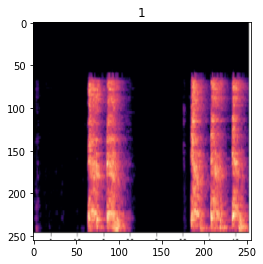

In [131]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    print(data.shape)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(batch_size=1)
    print(data.shape)
    pic = ToPILImage(data)
    plt.title(int(target))
    plt.imshow(pic)
    plt.show()
    break

In [153]:
from copy import copy

train_size = 1300
test_size = 267

train_data, test_data = torch.utils.data.random_split(dataset, [train_size, test_size])
train_data.dataset = copy(dataset)
train_data.dataset.transform = compose
test_data.dataset.transform = compose

In [142]:
BATCH_SIZE = 1

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [143]:
# import torchvision.models as models

# model = models.resnet50(pretrained=False)

# model.l1 = nn.Linear(2048, 256)
# nn.init.kaiming_normal_(model.l1.weight)
# model.l2 = nn.Linear(256, 128)
# nn.init.kaiming_normal_(model.l2.weight)
# model.l3 = nn.Linear(128, 2)
# nn.init.kaiming_normal_(model.l3.weight)

# model.fc = nn.Sequential(nn.BatchNorm1d(2048),
#                          nn.Dropout(0.5),
#                          model.l1,
#                          nn.BatchNorm1d(256),
#                          nn.Dropout(0.5),
#                          model.l2,
#                          nn.BatchNorm1d(128),
#                          nn.Dropout(0.5),
#                          model.l3,
#                          nn.BatchNorm1d(2)
#                       )
# model = model.to(device)

In [144]:
# import torchvision.models as models

# model = models.resnet50(pretrained=False)


# model.l1 = nn.Linear(2048, 1024)
# nn.init.kaiming_normal_(model.l1.weight)
# model.l4 = nn.Linear(1024, 512)
# nn.init.kaiming_normal_(model.l4.weight)
# model.l5 = nn.Linear(512, 256)
# nn.init.kaiming_normal_(model.l5.weight)
# model.l2 = nn.Linear(256, 128)
# nn.init.kaiming_normal_(model.l2.weight)
# model.l3 = nn.Linear(128, 2)
# nn.init.kaiming_normal_(model.l3.weight)

# model.fc = nn.Sequential(nn.BatchNorm1d(2048),
#                          nn.Dropout(0.5),
#                          model.l1,
#                          nn.BatchNorm1d(1024),
#                          nn.Dropout(0.5),
#                          model.l4,
#                          nn.BatchNorm1d(512),
#                          nn.Dropout(0.5),
#                          model.l5,
#                          nn.BatchNorm1d(256),
#                          nn.Dropout(0.5),
#                          model.l2,
#                          nn.BatchNorm1d(128),
#                          nn.Dropout(0.5),
#                          model.l3,
#                          nn.BatchNorm1d(2)
#                       )

# model = model.to(device)

In [154]:
import torchvision.models as models

model = models.resnet50(pretrained=False)

model.l1 = nn.Linear(2048, 2)
nn.init.kaiming_normal_(model.l1.weight)

model.fc = nn.Sequential(nn.BatchNorm1d(2048),
                         nn.Dropout(0.5),
                         model.l1,
                         nn.BatchNorm1d(2)
                      )
#양성이 0
model = model.to(device)

In [ ]:
import torchvision.models as models

model = models.resnet18(pretrained=False)

model.l1 = nn.Linear(2048, 2)
nn.init.kaiming_normal_(model.l1.weight)

model.fc = nn.Sequential(nn.BatchNorm1d(2048),
                         nn.Dropout(0.5),
                         model.l1,
                         nn.BatchNorm1d(2)
                      )
#양성이 0
model = model.to(device)

In [155]:
n = 0
for data, target in train_loader:
    print(data.shape) # (batch, channel, width, height)
    break

data = data.to(device)

with torch.no_grad():
    y = model(data)
    print(y)
    print(np.argmax(y.cpu(), axis=1), target)

torch.Size([10, 3, 255, 255])
tensor([[ 1.5967, -0.7782],
        [-0.1312,  0.2867],
        [ 1.1252,  0.6447],
        [-0.1244,  0.6218],
        [-1.9879,  0.3100],
        [-0.0334,  0.3474],
        [ 0.0314, -0.7803],
        [ 0.3266, -1.5111],
        [-1.3419, -1.1567],
        [ 0.5389,  2.0157]], device='cuda:0')
tensor([0, 1, 0, 1, 1, 1, 0, 0, 1, 1]) tensor([0, 1, 1, 1, 0, 0, 1, 1, 0, 1])


In [156]:
BATCH_SIZE = 20

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)


In [157]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss().to(device)


n_epochs = 50 # 1회 학습

list_training_loss = []
list_test_loss = []
batch_length = int(len(train_data) / BATCH_SIZE)

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0
    model.train()
    for train_data, train_target in train_loader:
        train_data = train_data.to(device)
        train_target = train_target.to(device)
        y = model(train_data)
        del train_data
        loss = criterion(y, train_target).sum()
        train_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += 1
        del train_target
        #if( n_train % 10 == 0 ):
        #  print('epoch {}th: {}/{} loss - {}'.format(epoch, n_train, batch_length, loss.data.cpu().numpy().sum()))

    model.eval()
    n_test = 0
    test_loss = 0
    correct = 0
    total = 0
    for test_data, test_target in test_loader:
        test_data = test_data.to(device)
        test_target = test_target.to(device)
        y_pred = model(test_data)
        idx_pred = torch.max(y_pred, 1)[1]
        del test_data
        loss = criterion(y_pred, test_target).sum()
        test_loss += loss.data.cpu().numpy()
        n_test += 1
        total += len(test_target)
        correct += (idx_pred == test_target).sum()

    accuracy = correct * 100 / total
    print('epoch {}th training loss: {} test loss: {}, accuracy: {}'.format(
            epoch + 1, train_loss / n_train, test_loss / n_test,
            accuracy
        ))
    list_training_loss.append(train_loss / n_train)
    list_test_loss.append(test_loss / n_test)

epoch 1th training loss: 0.6903714519280654 test loss: 0.6651910160269056, accuracy: 59.176029205322266
epoch 2th training loss: 0.6813110048954304 test loss: 0.6789546268326896, accuracy: 56.92884063720703
epoch 3th training loss: 0.6718999688441937 test loss: 0.7312325324331012, accuracy: 49.438201904296875
epoch 4th training loss: 0.6635734237157381 test loss: 0.6669204192502158, accuracy: 59.176029205322266
epoch 5th training loss: 0.6616303260509785 test loss: 0.6460830654416766, accuracy: 61.797752380371094
epoch 6th training loss: 0.658009279691256 test loss: 0.658544374363763, accuracy: 61.797752380371094
epoch 7th training loss: 0.652645206451416 test loss: 0.6653685697487423, accuracy: 59.92509460449219
epoch 8th training loss: 0.6477406712678763 test loss: 0.6421641494546618, accuracy: 65.16854095458984
epoch 9th training loss: 0.662543418774238 test loss: 0.7546654024294445, accuracy: 56.17977523803711
epoch 10th training loss: 0.6530928327487066 test loss: 0.96223118901252

In [ ]:
n_epochs = 50 # 1회 학습

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0
    model.train()
    for train_data, train_target in train_loader:
        train_data = train_data.to(device)
        train_target = train_target.to(device)
        y = model(train_data)
        del train_data
        loss = criterion(y, train_target).sum()
        train_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += 1
        del train_target
        if( n_train % 10 == 0 ):
          print('epoch {}th: {}/{} loss - {}'.format(epoch, n_train, batch_length, loss.data.cpu().numpy().sum()))

    model.eval()
    n_test = 0
    test_loss = 0
    correct = 0
    total = 0
    for test_data, test_target in test_loader:
        test_data = test_data.to(device)
        test_target = test_target.to(device)
        y_pred = model(test_data)
        idx_pred = torch.max(y_pred, 1)[1]
        del test_data
        loss = criterion(y_pred, test_target).sum()
        test_loss += loss.data.cpu().numpy()
        n_test += 1
        total += len(test_target)
        correct += (idx_pred == test_target).sum()

    accuracy = correct * 100 / total
    print('epoch {}th training loss: {} test loss: {}, accuracy: {}'.format(
            epoch + 11, train_loss / n_train, test_loss / n_test,
            accuracy
        ))
    list_training_loss.append(train_loss / n_train)
    list_test_loss.append(test_loss / n_test)

epoch 1th training loss: 0.5689452886581421 test loss: 0.9762775301933289, accuracy: 49.06367111206055
epoch 2th training loss: 0.5573421716690063 test loss: 0.9950575530529022, accuracy: 54.3071174621582
epoch 3th training loss: 0.5347699097224644 test loss: 0.7533001899719238, accuracy: 60.299625396728516
epoch 4th training loss: 0.5009396544524601 test loss: 0.7055460214614868, accuracy: 61.423221588134766
epoch 5th training loss: 0.4861600228718349 test loss: 0.7265870571136475, accuracy: 58.05243682861328
epoch 6th training loss: 0.45640718936920166 test loss: 0.8684696853160858, accuracy: 60.674156188964844
epoch 7th training loss: 0.38756108709744047 test loss: 0.7069258987903595, accuracy: 64.0449447631836
epoch 8th training loss: 0.44934540135519846 test loss: 0.9801680445671082, accuracy: 53.932586669921875
epoch 9th training loss: 0.4052743741444179 test loss: 0.9807433485984802, accuracy: 60.299625396728516
epoch 10th training loss: 0.3759211599826813 test loss: 0.873552292

In [ ]:
torch.save(model, f'./model.pt')

In [ ]:
pwd

'/content'